<a href="https://colab.research.google.com/github/RodrigoTito/Projeto-de-machine-learning/blob/main/Clientes_propensos_ao_uso_de_um_determinado_produto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de machine learning

### Desafio proposto

O desafio aqui é apresentar um projeto de machine learning para identificar clientes propensos ao uso de um determinado produto.

Para tanto, usarei um conjunto de dados fictício que advém de um determinado banco privado de médio porte que inclui uma variedade de produtos bancários, como contas de poupança, contas correntes, produtos de investimento, produtos de crédito e empréstimos imobiliários. Este conjunto de dados está disponível na comunidade [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/all/#active) em [AmExpert 2021 - Hackathon de aprendizado de máquina](https://datahack.analyticsvidhya.com/contest/amexpert-2021-machine-learning-hackathon/#About).

### Informações demográficas sobre os clientes do conjunto de dados

Column name   | Descrição 
--------- | ------------
Customer_ID | ID único para o cliente 
Gender      | Gênero do Cliente
Age         | Idade do cliente (em anos)
Vintage     | Vintage para o cliente (em meses)
Is_Active   | Índice de atividade, 0: cliente menos frequente, 1: cliente mais frequente
City_Category| Categoria codificada da cidade do cliente
Customer_Category| Categoria codificada do cliente
Product_Holding_B1| Produto em uso  (codificado)
Product_Holding_B2| Produto a uso futuro (Codificado) - Coluna de Destino

### Resumo do projeto

* Bibliotecas necessárias
* Carregar dados 
* EDA - Análise Exploratória de Dados
* Pré-processamento e modelagem dos dados 
* Previsão da variável destino usando regressão logística 
* Métrica de avaliação com base no problema 
* Previsão e apresentação

### Bibliotecas

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Carregar Dados

In [4]:
print(sorted(os.listdir("/content")))

['.config', 'sample_data', 'test_VkM91FT.csv', 'train_go05W65.csv']


In [5]:
test, train = [pd.read_csv(f"../content/{f}", ) for f in sorted(os.listdir("../content"))[-2:]]

### EDA - Análise Exploratória de Dados

* Os tamanhos dos datasets

In [6]:
[x.shape for x in [test, train]]

[(20327, 8), (37748, 9)]

* Variáveis do dataset train

In [7]:
pd.DataFrame({'Cols_Train':train.columns})

,Cols_Train
0,Customer_ID
1,Gender
2,Age
3,Vintage
4,Is_Active
5,City_Category
6,Customer_Category
7,Product_Holding_B1
8,Product_Holding_B2


* Colunas diferentes dos datasets train e test

In [8]:
train.columns.difference(test.columns)

Index(['Product_Holding_B2'], dtype='object')

* Tipo das variáveis

In [9]:
train.dtypes.value_counts()  

object    6
int64     3
dtype: int64

* Visualizando o dataset train

In [10]:
train.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


* Resumo de cada variável do dataset train

In [11]:
df_aux = pd.DataFrame({'Type': train.dtypes,
                      'Missing': train.isna().sum(),
                      'Size': train.shape[0],
                       'Unique': train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
Customer_ID,object,0,37748,37748,0.0
Gender,object,0,37748,2,0.0
Age,int64,0,37748,36,0.0
Vintage,int64,0,37748,64,0.0
Is_Active,int64,0,37748,2,0.0
City_Category,object,0,37748,2,0.0
Customer_Category,object,0,37748,3,0.0
Product_Holding_B1,object,0,37748,617,0.0
Product_Holding_B2,object,0,37748,495,0.0


* Resumo de cada variável do dataset test

In [12]:
df_aux = pd.DataFrame({'Type': test.dtypes,
                      'Missing': test.isna().sum(),
                      'Size': test.shape[0],
                       'Unique': test.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
Customer_ID,object,0,20327,20327,0.0
Gender,object,0,20327,2,0.0
Age,int64,0,20327,36,0.0
Vintage,int64,0,20327,63,0.0
Is_Active,int64,0,20327,2,0.0
City_Category,object,0,20327,2,0.0
Customer_Category,object,0,20327,3,0.0
Product_Holding_B1,object,0,20327,510,0.0


* Estatísticas descritivas

In [13]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,37748.0,38.521379,10.121811,24.0,29.0,37.0,47.0,59.0
Vintage,37748.0,19.573169,10.252417,2.0,13.0,16.0,23.0,65.0
Is_Active,37748.0,0.264809,0.441237,0.0,0.0,0.0,1.0,1.0


* Visualização 

Gráficos de colunas

In [14]:
def grafico_com_porcentagem(df,feature,hue):
    total = len(df)
    ax =  sns.countplot(x=feature,hue=hue, data=df,color = "#2b8cbe")
    ax.set_ylim(0,total*1.1) # Ajusta altura do frame
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (x, y+10), ha='center')
    return ax
def grafico_com_porcentagem_1(g):
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        g.ax.annotate('{:.2f}%'.format(p.get_height()), (x, y+2), ha='center')
    return g

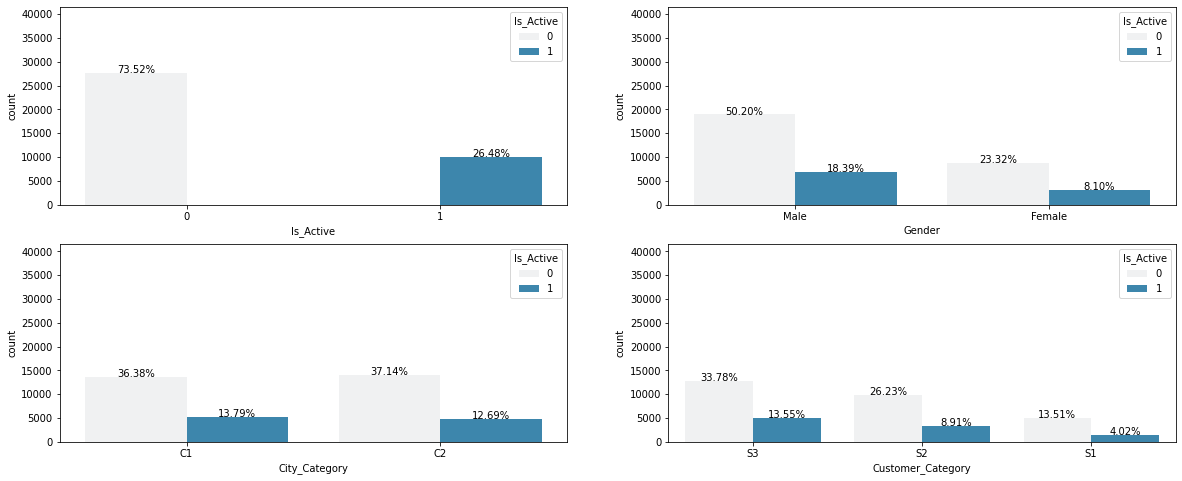

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(221),grafico_com_porcentagem(train,'Is_Active','Is_Active')
plt.subplot(222),grafico_com_porcentagem(train,'Gender','Is_Active')
plt.subplot(223),grafico_com_porcentagem(train,'City_Category','Is_Active')
plt.subplot(224),grafico_com_porcentagem(train,'Customer_Category','Is_Active')
plt.show()

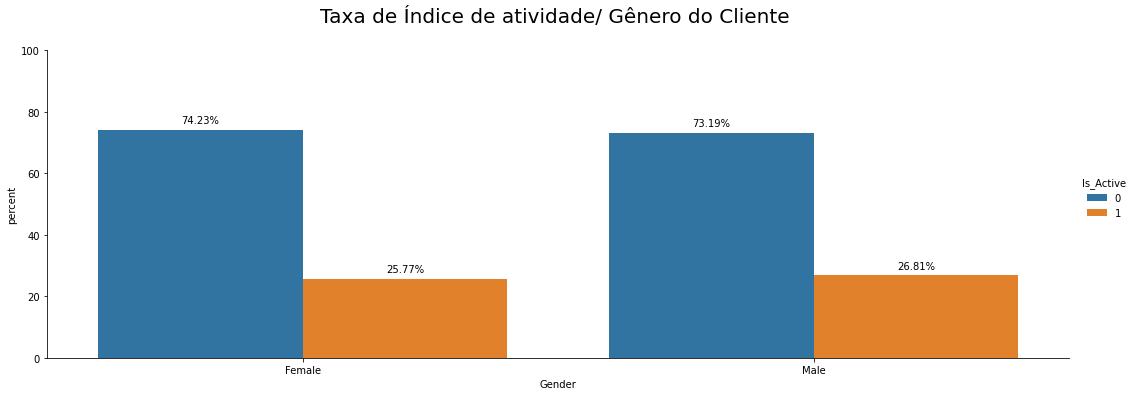

In [16]:
df1 = train.groupby('Gender')['Is_Active'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Gender',y='percent',hue='Is_Active',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de Índice de atividade/ Gênero do Cliente \n', fontsize=20)
plt.show()

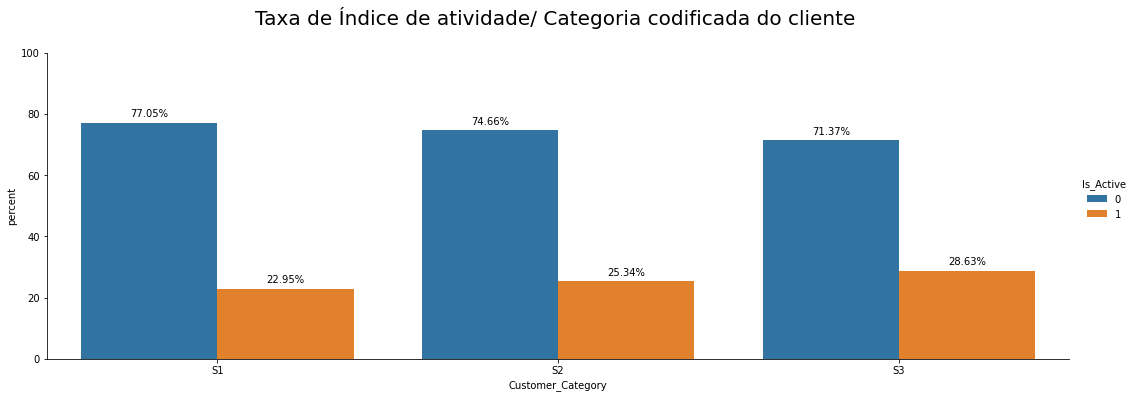

In [17]:
df1 = train.groupby('Customer_Category')['Is_Active'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Customer_Category',y='percent',hue='Is_Active',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de Índice de atividade/ Categoria codificada do cliente \n', fontsize=20)
plt.show()

* Lista com os códigos da coluna **Product_Holding_B1** -  produto em uso sem duplicação:

In [19]:
list_codigo_exclusivo_atual = []
for i in train['Product_Holding_B1']:
  list_codigo_exclusivo_atual = list(set(list_codigo_exclusivo_atual + eval(i))) # Lista cm a codificação sem duplicação: 

list_codigo_exclusivo_atual.sort()
print(list_codigo_exclusivo_atual,'\n \n','São',len(list_codigo_exclusivo_atual), 'produtos')

['P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P2', 'P20', 'P21', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'] 
 
 São 22 produtos


* O top 15 produtos mais utilizados no dataset:  coluna **Product_Holding_B1**	- produto em uso

In [18]:
Product_Holding_B1 = pd.DataFrame({'Product_Holding_B1':train['Product_Holding_B1'].value_counts(),
              'Product_Holding_B1_%':(train['Product_Holding_B1'].value_counts(normalize=True)*100).round(2)})
Product_Holding_B1.head(15)

,Product_Holding_B1,Product_Holding_B1_%
['P13'],7443,19.72
['P16'],4424,11.72
['P17'],2342,6.20
['P11'],1581,4.19
"['P16', 'P21']",1270,3.36
"['P13', 'P21']",1106,2.93
"['P13', 'P17']",1093,2.90
"['P8', 'P13']",1067,2.83
"['P12', 'P13']",1043,2.76
"['P12', 'P16']",1036,2.74



Agora, veremos quais dos 22 produtos estão mais em uso no dataset. 


* Contabilizando os produtos em uso

In [20]:
count_prod_atual_cod = []
for p_cod in list_codigo_exclusivo_atual:
  cont = 0
  for p_hol in train['Product_Holding_B1']:
    if p_cod in eval(p_hol):
      cont = cont + 1
  count_prod_atual_cod.append(cont)

* Salvando em um data frame

In [21]:
dict_prod_atual_list = dict(zip(list_codigo_exclusivo_atual,count_prod_atual_cod))
query_prod_atual = pd.DataFrame(dict_prod_atual_list,index = [0],columns = list_codigo_exclusivo_atual)
query_prod_atual

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P3,P4,P5,P6,P7,P8,P9
0,1014,12,1472,1920,6120,16870,129,540,11270,7205,338,2122,675,3708,6435,61,33,34,105,359,2695,460


* Visualizando 

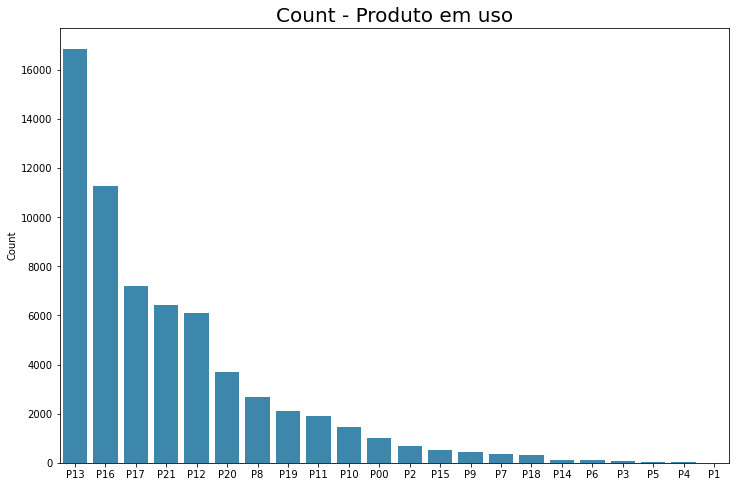

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(data=query_prod_atual.sort_values(by=0,axis=1,ascending=False),color = "#2b8cbe")
plt.title('Count - Produto em uso', fontsize=20)
plt.ylabel('Count')
plt.show()

* A seguir veremos o top 15 produtos que mais influenciam na aquisição de outros produtos. 

In [51]:
P_H_B1_AND_B2 = train.groupby('Product_Holding_B1')['Product_Holding_B2'].value_counts().sort_values(ascending=False).reset_index(name='Count')
P_H_B1_AND_B2 = pd.DataFrame(P_H_B1_AND_B2)
P_H_B1_AND_B2['Count_%']= round(P_H_B1_AND_B2.Count/sum(P_H_B1_AND_B2.Count) * 100,2)
P_H_B1_AND_B2.head(15)

,Product_Holding_B1,Product_Holding_B2,Count,Count_%
0,['P13'],['P00'],2592,6.87
1,['P17'],['P16'],1968,5.21
2,['P16'],['P8'],1928,5.11
3,['P13'],['P8'],1859,4.92
4,['P11'],['P00'],1427,3.78
5,['P2'],['P00'],662,1.75
6,"['P16', 'P21']",['P12'],618,1.64
7,['P16'],['P6'],576,1.53
8,['P16'],['P00'],576,1.53
9,['P13'],['P12'],570,1.51


* O top 15 produtos da **Product_Holding_B2**	- Coluna de Destino

In [52]:
Product_Holding_B2 = pd.DataFrame({'Product_Holding_B2':train['Product_Holding_B2'].value_counts(),
              'Product_Holding_B2_%':(train['Product_Holding_B2'].value_counts(normalize=True)*100).round(2)})
Product_Holding_B2.head(10)

,Product_Holding_B2,Product_Holding_B2_%
['P00'],5908,15.65
['P8'],5360,14.20
['P12'],3844,10.18
['P16'],3263,8.64
['P6'],2170,5.75
['P1'],1332,3.53
"['P8', 'P12']",1244,3.30
['P13'],1117,2.96
['P10'],1069,2.83
['P3'],858,2.27


* Lista com os códigos da coluna destino sem duplicação:

In [53]:
list_codigo_exclusivo_prox_meses = []
for i in train['Product_Holding_B2']:
  list_codigo_exclusivo_prox_meses = list(set(list_codigo_exclusivo_prox_meses + eval(i))) # Lista cm a codificação sem duplicação: 

list_codigo_exclusivo_prox_meses.sort()
print(list_codigo_exclusivo_prox_meses,'\n \n','São:',len(list_codigo_exclusivo_prox_meses),'produtos')

['P00', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P2', 'P20', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'] 
 
 São: 20 produtos


* Contabilizando os produtos codificados na variável destino

In [54]:
count_p_cod = []
for p_cod in list_codigo_exclusivo_atual:
  cont = 0
  for p_hol in train['Product_Holding_B2']:
    if p_cod in eval(p_hol):
      cont = cont + 1
  count_p_cod.append(cont)

* Salvando no data frame

In [56]:
dict_from_list = dict(zip(list_codigo_exclusivo_atual,count_p_cod))
query_prod_prox_meses = pd.DataFrame(dict_from_list,index = [0],columns = list_codigo_exclusivo_atual).sort_values(by=0,axis=1,ascending=False)
query_prod_prox_meses

,P8,P12,P00,P6,P16,P1,P4,P10,P7,P3,P9,P13,P5,P2,P11,P15,P14,P17,P20,P18,P21,P19
0,11518,7285,5908,4675,3478,3310,2943,2914,2526,2486,1833,1494,1211,206,186,41,20,17,4,2,0,0


* Visualizando em gráfico de barra

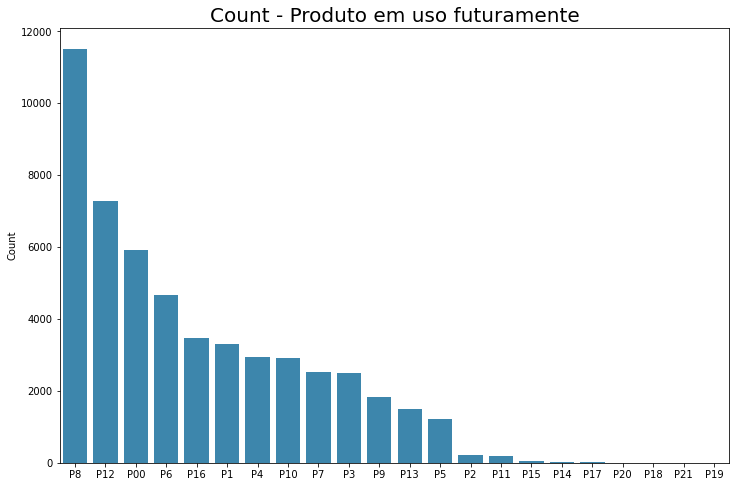

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(data=query_prod_prox_meses,color = "#2b8cbe")
plt.title('Count - Produto em uso futuramente', fontsize=20)
plt.ylabel('Count')
plt.show()

### Pré-processamento e modelagem dos dados

* Fazendo uma cópia do dataset train

In [59]:
X = train.copy()

* One-Hot na variável  **Product_Holding_B1**

In [60]:
for p_cod in list_codigo_exclusivo_atual:
  X_cod_p = []
  for p_hol in train['Product_Holding_B1']:
    if p_cod in eval(p_hol):
      X_cod_p.append(1)
    else:
      X_cod_p.append(0)
  X[p_cod] = X_cod_p 

**Dividir dados**

* Separando a variável resposta das variáveis preditoras

In [61]:
X = train.drop(['Product_Holding_B2'],axis=1)
y= train[["Product_Holding_B2"]]
test_Customer_ID = test['Customer_ID']

* One-Hot na variável **Product_Holding_B2**

In [ ]:
for p_cod in list_codigo_exclusivo_prox_meses:
  cod_p = []
  for p_hol in y['Product_Holding_B2']:
    if p_cod in eval(p_hol):
      cod_p.append(1)
    else:
      cod_p.append(0)
  y[p_cod] = cod_p 

In [64]:
y = y.drop('Product_Holding_B2',axis=1)

* Concatenando o dataset X com o dataset test

In [65]:
All_data = pd.concat([X, test], axis=0)

* One-Hot na variável **Product_Holding_B1**

In [66]:
for p_cod in list_codigo_exclusivo_atual:
  cols_cod_p = []
  for p_hol in All_data['Product_Holding_B1']:
    if p_cod in eval(p_hol):
      cols_cod_p.append(1)
    else:
      cols_cod_p.append(0)
  All_data[p_cod] = cols_cod_p 

* Eliminado as variáveis **Customer_ID** e **Product_Holding_B1**

In [67]:
All_data.drop(['Customer_ID','Product_Holding_B1'],axis=1,inplace=True)

* Listando os índices das variáveis categóricas

In [68]:
cat_cols=All_data.select_dtypes("object").columns.tolist()
cat_cols

['Gender', 'City_Category', 'Customer_Category']

* Criando variáveis fictícias para as variáveis categóricas

In [69]:
all_data = pd.get_dummies(All_data, columns=cat_cols)

* Uma visão geral das estatísticas:

In [70]:
df_stats = all_data.describe().transpose()
df_stats.head(5)

,count,mean,std,min,25%,50%,75%,max
Age,58075.0,38.460146,10.111050,24.0,29.0,37.0,47.0,59.0
Vintage,58075.0,19.585674,10.252426,2.0,13.0,16.0,23.0,80.0
Is_Active,58075.0,0.264572,0.441109,0.0,0.0,0.0,1.0,1.0
P00,58075.0,0.026001,0.159139,0.0,0.0,0.0,0.0,1.0
P1,58075.0,0.000258,0.016069,0.0,0.0,0.0,0.0,1.0


* Normalizando os dados

In [71]:
def norm(x):
  return (x - df_stats['mean']) / df_stats['std']

all_data = norm(all_data)

* Separando os datasets  

In [72]:
X = all_data[:len(X)]
test = all_data[len(X):]

In [73]:
X.shape, test.shape

((37748, 32), (20327, 32))

* Dividindo o dataset de treinamento e validação

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
def train_test_split_yi(X,y):
  Xtrain, Xval, ytrain, yval = train_test_split(X, y, random_state=0, train_size=0.75, stratify=y)
  return Xtrain, Xval, ytrain, yval

### Modelo  de classificação -  Regressão Logística 

**Usaremos as seguintes métricas de avaliação:**

1. Recall
2. Precision 
3. ROC - AUC : Área sob a curva característica de operação do receptor. Ou seja,  é a área sob a curva ao traçar a taxa de verdadeiro positivo (normalizada) (eixo x) e a taxa de falso positivo (eixo y).

*Nossa métrica principal aqui será os valores de Recall, enquanto o AUC ROC Score cuidará de quão bem as probabilidades previstas são capazes de diferenciar entre as 2 classes.*

* importando os pacotes do modelo e das métricas que serão utilizadas 


In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  roc_curve, roc_auc_score, recall_score,precision_score

* Treinando o medelo de regressão logística para cada produto 

In [ ]:
regressao_logistica = []
score = []
recall_list = []
precision_list = []
roc_auc_score_list = []
fpr_list = []
tpr_list = []
for p_cod in list_codigo_exclusivo_prox_meses:
  Xtrain, Xval, ytrain, yval = train_test_split_yi(X,y[p_cod])
  reg_log  = LogisticRegression().fit(Xtrain, ytrain)
  regressao_logistica.append(reg_log)
  score.append(reg_log.score(Xval,yval))
  pred_val = reg_log.predict(Xval)
  recall_list.append(recall_score(yval,pred_val)) 
  precision_list.append(precision_score(yval,pred_val))
  if p_cod == 'P18':
    roc_auc_score_list.append(1)
  else:
    roc_auc_score_list.append(roc_auc_score(yval,reg_log.predict_proba(Xval)[:,1]))
  fpr, tpr, _ = roc_curve(yval,reg_log.predict_proba(Xval)[:,1])
  fpr_list.append(fpr)
  tpr_list.append(tpr)



In [206]:
df_metrics = pd.DataFrame({'score': score, 
                           'recall_score': recall_list,
                           'precision_score':precision_list,
                           'roc_auc_score':roc_auc_score_list},
                          index = list_codigo_exclusivo_prox_meses).transpose()
df_metrics

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P2,P20,P3,P4,P5,P6,P7,P8,P9
score,0.900710,0.920314,0.925188,0.995973,0.907492,0.975416,0.999470,0.998940,0.970224,0.999576,1.0,0.995232,0.999894,0.934513,0.926354,0.968316,0.899862,0.938646,0.759140,0.951468
recall_score,0.477319,0.229746,0.189560,0.326087,0.740802,0.482574,0.000000,0.000000,0.894131,0.000000,0.0,0.313725,0.000000,0.064412,0.202446,0.092409,0.358426,0.202853,0.410907,0.072052
precision_score,0.810345,0.622951,0.543307,0.681818,0.770857,0.821918,0.000000,0.000000,0.804348,0.000000,0.0,0.615385,0.000000,0.519481,0.579767,0.538462,0.682410,0.627451,0.672159,0.500000
roc_auc_score,0.932398,0.885860,0.881566,0.989340,0.938320,0.979900,0.941137,0.963414,0.991600,0.988339,1.0,0.975713,0.994913,0.826058,0.874005,0.852457,0.825916,0.877551,0.797583,0.831669


#### Curva AUC ROC 
Agora, vamos visualizar a curva AUC-ROC para cada modelo/produto de regressão logística

In [231]:
def plot_roc_auc(fpr,tpr,auc,prod): 
  ax = plt.plot(fpr,tpr,label=prod + ": Validação AUC-ROC="+str(round(auc,2))) 
  x = np.linspace(0, 1, 1000)
  plt.plot(x, x, linestyle='-')
  plt.xlabel('Taxa de falso positivo') 
  plt.ylabel('Taxa de verdadeiro positivo') 
  plt.legend(loc=4) 
  return ax

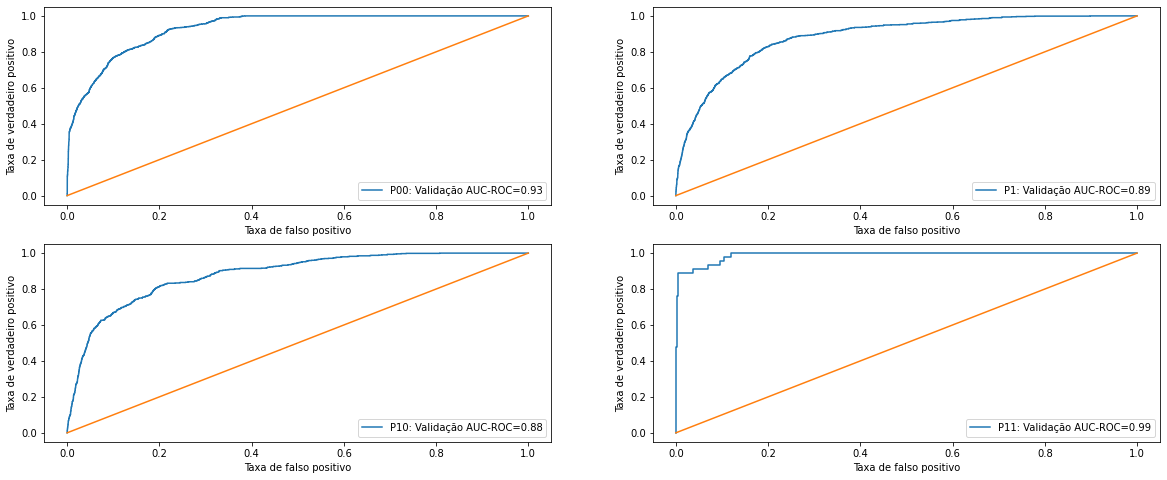

In [232]:
plt.figure(figsize=(20,8))
plt.subplot(221),plot_roc_auc(fpr_list[0],tpr_list[0],roc_auc_score_list[0],y.columns[0])
plt.subplot(222),plot_roc_auc(fpr_list[1],tpr_list[1],roc_auc_score_list[1],y.columns[1])
plt.subplot(223),plot_roc_auc(fpr_list[2],tpr_list[2],roc_auc_score_list[2],y.columns[2])
plt.subplot(224),plot_roc_auc(fpr_list[3],tpr_list[3],roc_auc_score_list[3],y.columns[3])
plt.show()

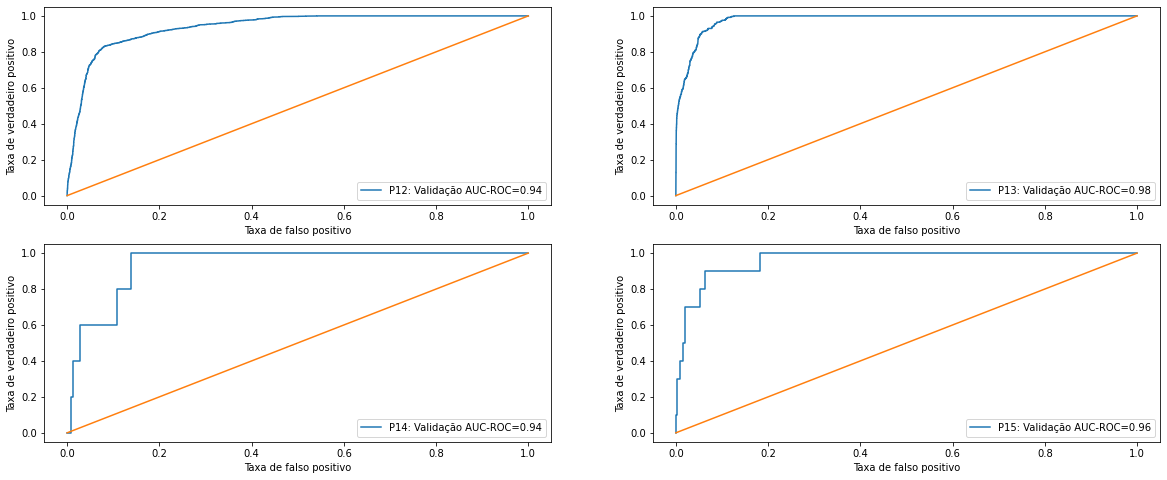

In [233]:
plt.figure(figsize=(20,8))
plt.subplot(221),plot_roc_auc(fpr_list[4],tpr_list[4],roc_auc_score_list[4],y.columns[4])
plt.subplot(222),plot_roc_auc(fpr_list[5],tpr_list[5],roc_auc_score_list[5],y.columns[5])
plt.subplot(223),plot_roc_auc(fpr_list[6],tpr_list[6],roc_auc_score_list[6],y.columns[6])
plt.subplot(224),plot_roc_auc(fpr_list[7],tpr_list[7],roc_auc_score_list[7],y.columns[7])
plt.show()

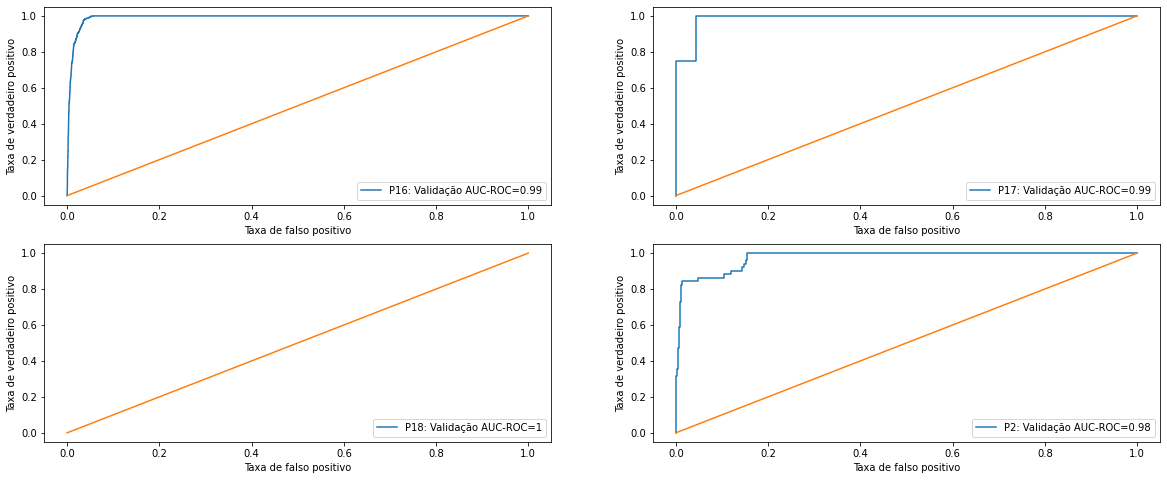

In [234]:
plt.figure(figsize=(20,8))
plt.subplot(221),plot_roc_auc(fpr_list[8],tpr_list[8],roc_auc_score_list[8],y.columns[8])
plt.subplot(222),plot_roc_auc(fpr_list[9],tpr_list[9],roc_auc_score_list[9],y.columns[9])
plt.subplot(223),plot_roc_auc(fpr_list[10],tpr_list[10],roc_auc_score_list[10],y.columns[10])
plt.subplot(224),plot_roc_auc(fpr_list[11],tpr_list[11],roc_auc_score_list[11],y.columns[11])
plt.show()

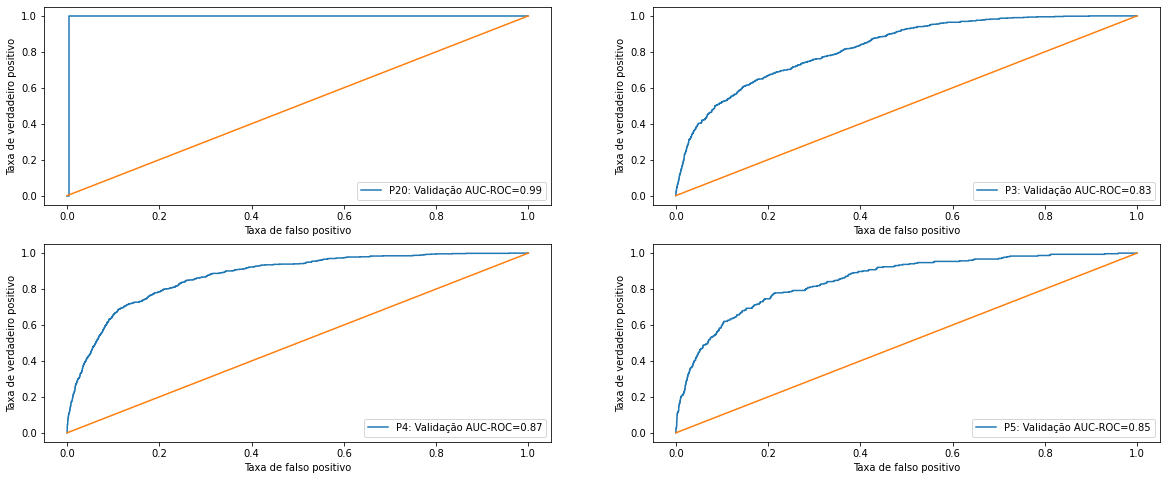

In [235]:
plt.figure(figsize=(20,8))
plt.subplot(221),plot_roc_auc(fpr_list[12],tpr_list[12],roc_auc_score_list[12],y.columns[12])
plt.subplot(222),plot_roc_auc(fpr_list[13],tpr_list[13],roc_auc_score_list[13],y.columns[13])
plt.subplot(223),plot_roc_auc(fpr_list[14],tpr_list[14],roc_auc_score_list[14],y.columns[14])
plt.subplot(224),plot_roc_auc(fpr_list[15],tpr_list[15],roc_auc_score_list[15],y.columns[15])
plt.show()

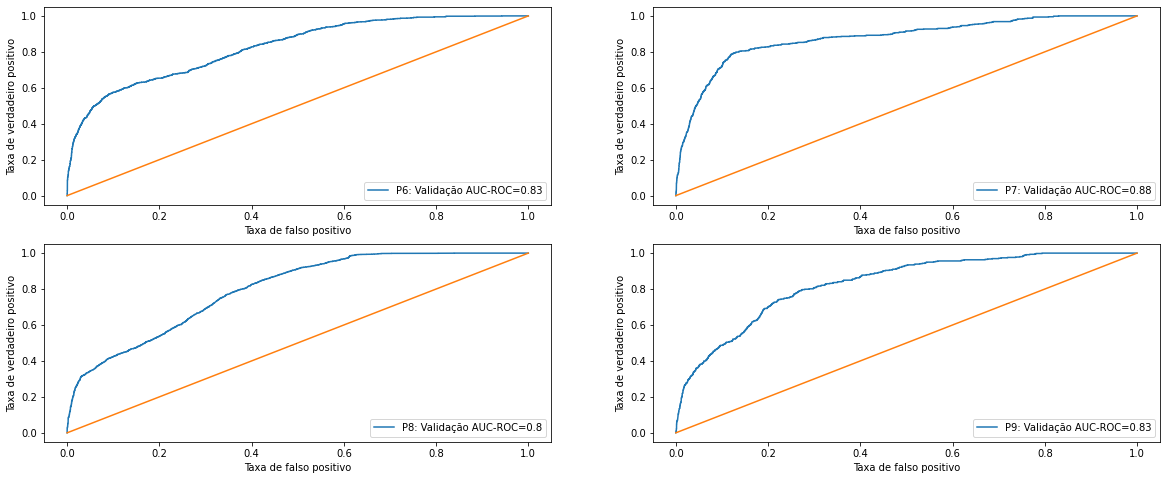

In [236]:
plt.figure(figsize=(20,8))
plt.subplot(221),plot_roc_auc(fpr_list[16],tpr_list[16],roc_auc_score_list[16],y.columns[16])
plt.subplot(222),plot_roc_auc(fpr_list[17],tpr_list[17],roc_auc_score_list[17],y.columns[17])
plt.subplot(223),plot_roc_auc(fpr_list[18],tpr_list[18],roc_auc_score_list[18],y.columns[18])
plt.subplot(224),plot_roc_auc(fpr_list[19],tpr_list[19],roc_auc_score_list[19],y.columns[19])
plt.show()

### Previsão e apresentação

* Prevendo os produtos que os clientes do conjunto de dados test (conjunto de dados sem rótulo, ou seja, sem a variável resposta) estão propensos a usarem 

In [242]:
y_pred_test = pd.DataFrame(regressao_logistica[0].predict(test),columns=['P00'])
for i,p_cod in enumerate(y.columns[1:]):
  y_pred_test[p_cod] = regressao_logistica[i+1].predict(test)

In [243]:
y_pred_test.head()

,P00,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P2,P20,P3,P4,P5,P6,P7,P8,P9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Convertendo os valores 0 e 1 para os valores entregáveis 

In [244]:
for p_cod in y_pred_test.columns:
  y_pred_test[[p_cod]] = y_pred_test[[p_cod]].replace({1:str(p_cod),0:''})

y_pred_test['y_pred'] = y_pred_test.apply(lambda x: str(' '.join(x).split()), axis=1)
y_pred_test['y_pred']

0                    ['P8']
1                        []
2                   ['P16']
3                   ['P12']
4                   ['P00']
                ...        
20322                    []
20323                    []
20324                    []
20325    ['P1', 'P6', 'P7']
20326                ['P8']
Name: y_pred, Length: 20327, dtype: object

* Resultado entregável 

In [250]:
result_final = pd.DataFrame({'Id do Cliente': test_Customer_ID, 'Prodts. previstos': y_pred_test['y_pred']})
result_final

,Id do Cliente,Prodts. previstos
0,CC372708,['P8']
1,CC216072,[]
2,CC387629,['P16']
3,CC389228,['P12']
4,CC394445,['P00']
...,...,...
20322,CC303542,[]
20323,CC266713,[]
20324,CC393639,[]
20325,CC285013,"['P1', 'P6', 'P7']"


* Salvando no formato .csv para envio

In [ ]:
result_final.to_csv("resultado_final.csv", index = False)